# iFFT to create signal with given Spectrum

In [1]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

import cmath
from scipy.fftpack import fft, ifft, fftfreq, fftshift

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx[0]],idx[0]

Running Python: 3.8.19
Running Sympy: 1.12.1


## Flat Spectrum - Set Parameters 

In [15]:
#Td = 2
Fs = 500
T = 1/Fs
L = 256 #                     % Length of signal
n = int(2**np.ceil(np.log2(L))) #
delta_freq = Fs/n

f = np.linspace(0,1/2-1/n,n)*Fs #   % freq vector 
t = np.arange(L)*T

In [16]:
# bounds of rect in Y(f)
f1 = 15
f2 = 30
# find equivalent positions in Y(f) 
n1 = int(f1/delta_freq)
n2 = int(f2/delta_freq)
L1 = np.array([n1,n2])

## Create Y(f) and y[n]

In [17]:
Y_bl = np.zeros((n,), dtype=complex)
# create random phase needed for correct ifft process
rng = np.random.default_rng()
phi = rng.uniform(0, 2*np.pi, (len(L1),))

# create Y(f)
mag_temp = np.array([1,0.15])
    
Y_bl[L1] = mag_temp*np.exp(1j*phi)
# add complex conjugate at upper end to ensure that y[n] real
Y_bl[np.array(n)-L1] = np.conj(Y_bl[L1])

# create y[n]
y_bl = ifft(Y_bl)

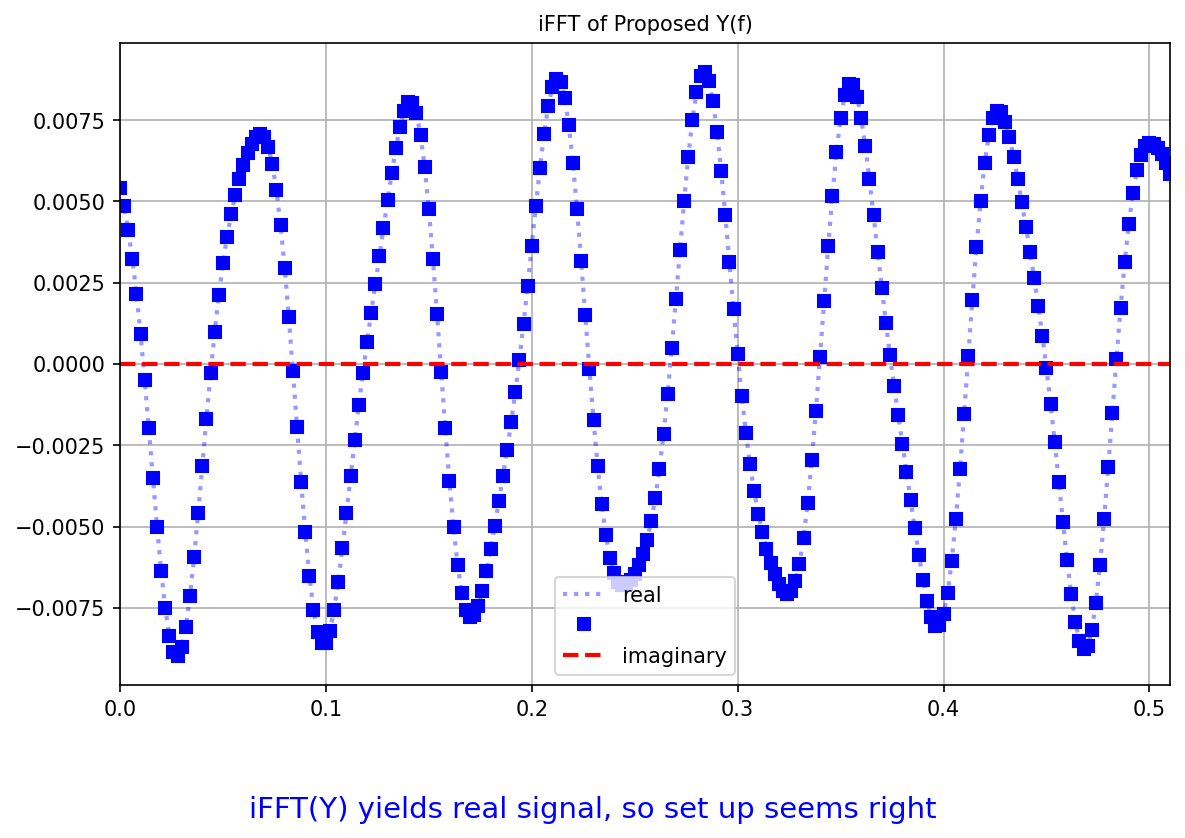

In [18]:
# check that it is real
fig = plt.figure(figsize=(8,5), dpi=150)
plt.plot(t, y_bl.real, 'b:', alpha=0.4)
plt.plot(t, y_bl.real, 'bs')
plt.plot(t, y_bl.imag, 'r--')
plt.legend(('real', '', 'imaginary'))
plt.title('iFFT of Proposed Y(f)')
caption("iFFT(Y) yields real signal, so set up seems right",fig)
plt.show()

## FFT the created data to confirm spectrum is right

In [19]:
Y_bl_fft = fft(y_bl)
f_bl = fftfreq(n, 1/Fs)

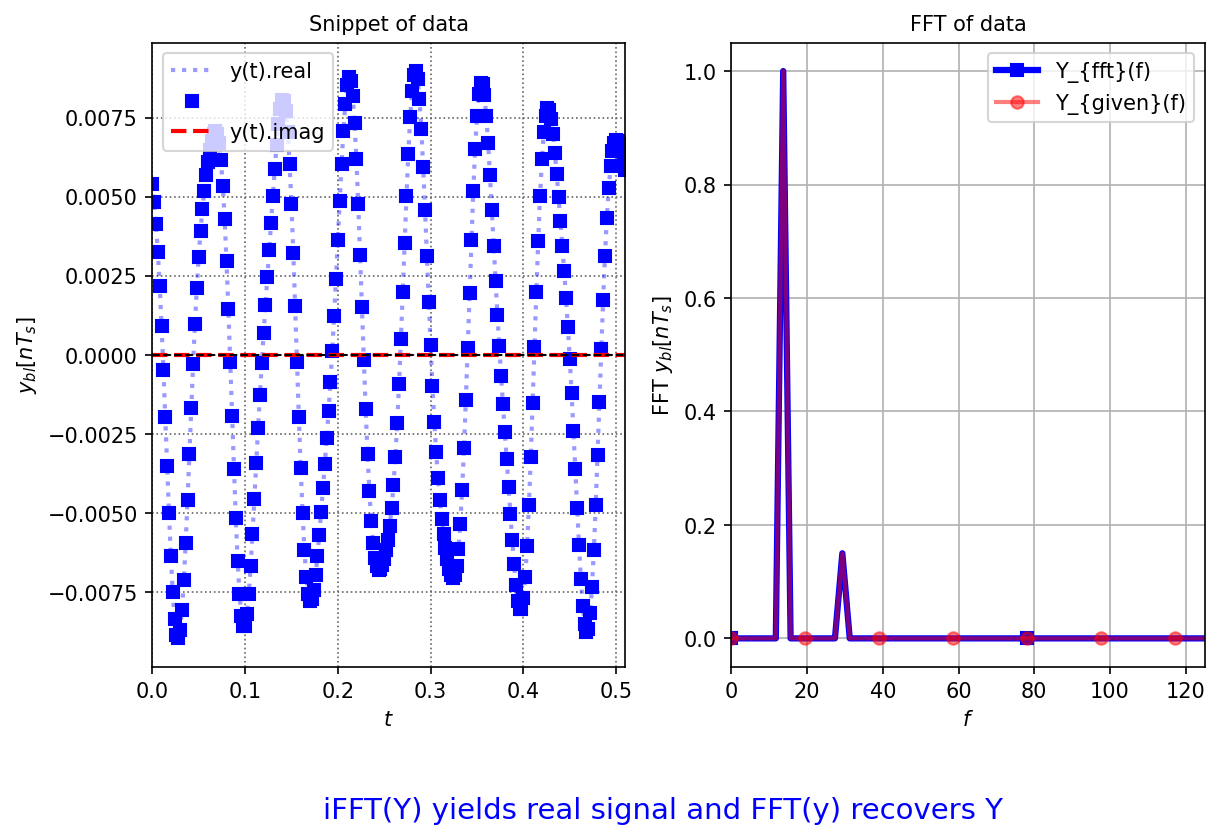

In [20]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
fig.tight_layout(pad=2)
ax1.plot(t, y_bl.real, 'b:', alpha=0.4)
ax1.plot(t, y_bl.real, 'bs')
ax1.plot(t, y_bl.imag, 'r--')
ax1.set_ylabel('$y_{bl}[nT_s]$')
ax1.set_xlabel('$t$')
ax1.legend(['y(t).real',' ','y(t).imag'])
ax1.set_title('Snippet of data')
nicegrid(ax1)

ax2.plot(f_bl[0:n//2], np.abs(Y_bl_fft[0:n//2]),'bs-',lw=3,markevery=40)
ax2.plot(f_bl[0:n//2], np.abs(Y_bl[0:n//2]),'ro-',alpha=0.5,markevery=10)
ax2.set_ylabel('FFT $y_{bl}[nT_s]$')
ax2.set_xlabel('$f$')
ax2.set_xlim([0, Fs/4])
ax2.legend(['Y_{fft}(f)','Y_{given}(f)'])
ax2.set_title('FFT of data')
fig.savefig('./figs/T8_ex12_1.pdf', dpi=300)
caption("iFFT(Y) yields real signal and FFT(y) recovers Y",fig)
plt.show()

In [21]:
file_name = 'data/ifft_ex12_csv_file'+'_'+str(Fs)+'.csv'
np.savetxt(file_name, np.real(y_bl), delimiter=',', fmt='%f')

## Second Example

In [22]:
# bounds of rect in Y(f)
f1 = 15
f2 = 50
# find equivalent positions in Y(f) 
n1 = int(f1/delta_freq)
n2 = int(f2/delta_freq)
L1 = np.array([n1,n2])

# bounds of rect in Y(f)
f_low = 100
f_high = 200
# find equivalent positions in Y(f) 
n_low = int(f_low/delta_freq)
n_high = int(f_high/delta_freq)
L2 = np.arange(n_low,n_high)

### Create Y(f) and y[n]

In [23]:
Y_bl = np.zeros((n,), dtype=complex)
# create random phase needed for correct ifft process
rng = np.random.default_rng()
phi = rng.uniform(0, 2*np.pi, (len(L1),))
# create Y(f)
mag_temp = np.array([1,0.5])
    
Y_bl[L1] = mag_temp*np.exp(1j*phi)
# add complex conjugate at upper end to ensure that y[n] real
Y_bl[np.array(n)-L1] = np.conj(Y_bl[L1])

# create random phase needed for correct ifft process
rng = np.random.default_rng()
phi = rng.uniform(0, 2*np.pi, (len(L2),))
# create Y(f)
mag_temp = np.sin(np.pi*np.arange(0,n_high-n_low)/(n_high-n_low))/3
    
Y_bl[L2] = mag_temp*np.exp(1j*phi)
# add complex conjugate at upper end to ensure that y[n] real
Y_bl[np.array(n)-L2] = np.conj(Y_bl[L2])

# create y[n]
y_bl = ifft(Y_bl)

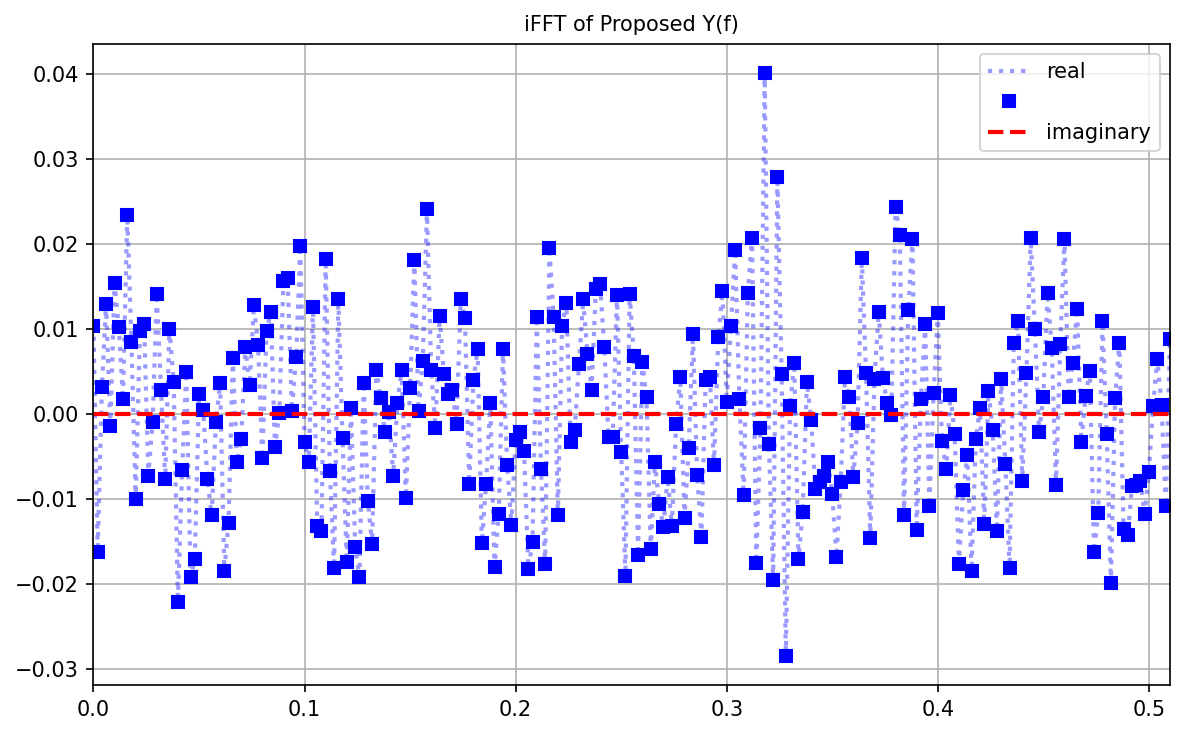

In [24]:
# check that it is real
fig = plt.figure(figsize=(8,5), dpi=150)
plt.plot(t, y_bl.real, 'b:', alpha=0.4)
plt.plot(t, y_bl.real, 'bs')
plt.plot(t, y_bl.imag, 'r--')
plt.legend(('real', '', 'imaginary'))
plt.title('iFFT of Proposed Y(f)')
plt.show()

## FFT the created data to confirm spectrum is right

In [25]:
Y_bl_fft = fft(y_bl)
f_bl = fftfreq(n, 1/Fs)

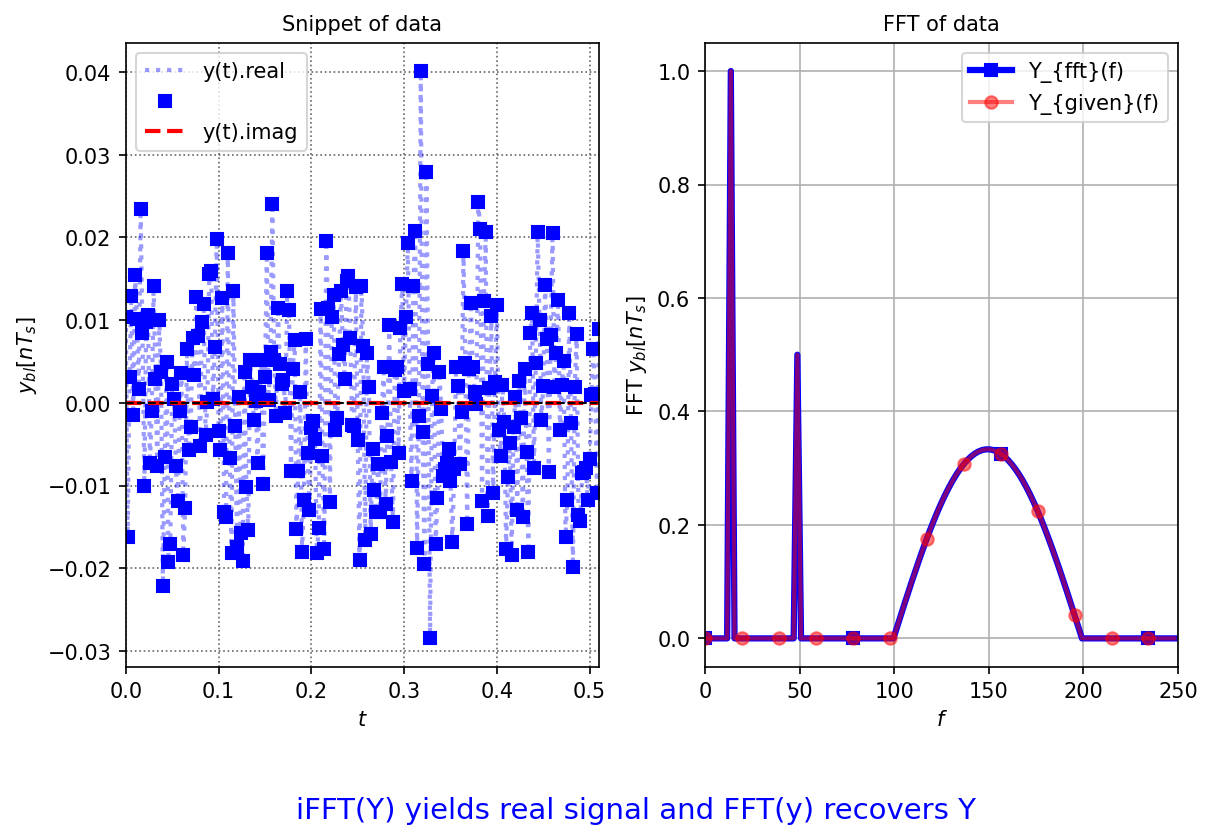

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,5), dpi=150)
fig.tight_layout(pad=2)
ax1.plot(t, y_bl.real, 'b:', alpha=0.4)
ax1.plot(t, y_bl.real, 'bs')
ax1.plot(t, y_bl.imag, 'r--')
ax1.set_ylabel('$y_{bl}[nT_s]$')
ax1.set_xlabel('$t$')
ax1.legend(['y(t).real',' ','y(t).imag'])
ax1.set_title('Snippet of data')
nicegrid(ax1)

ax2.plot(f_bl[0:n//2], np.abs(Y_bl_fft[0:n//2]),'bs-',lw=3,markevery=40)
ax2.plot(f_bl[0:n//2], np.abs(Y_bl[0:n//2]),'ro-',alpha=0.5,markevery=10)
ax2.set_ylabel('FFT $y_{bl}[nT_s]$')
ax2.set_xlabel('$f$')
ax2.set_xlim([0, Fs/2])
ax2.legend(['Y_{fft}(f)','Y_{given}(f)'])
ax2.set_title('FFT of data')
caption("iFFT(Y) yields real signal and FFT(y) recovers Y",fig)
fig.savefig('./figs/T8_ex12_2.pdf', dpi=300)
plt.show()